# Start visdom server

Open to different terminals

In first run:

```bash
python -m visdom.server -port 8100
```

In second:

```bash
python -m visdom.server -port 8101
```


In [ ]:
# Run testing script and checkpoint results

from osf_visualizer.visdom_visualizer.async.visualization_producer import VisualizationProducer
import numpy as np, time

environment_num = 2

for j in range(environment_num):
    vp = VisualizationProducer(experiment_name="Example{}".format(j), port=8100, wait_time=2,
                               items=['loss', 'val_loss', 'iou_score', 'val_iou_score']
                               )
    for i in range(1, 100):
        vp.on_epoch_end(i, {"loss": 1.0 / i, "iou_score": 0.01 * i, 'val_loss': 0.1, 'val_iou_score': 1.0})

    for i in [15, 10, 5]:
        vp.vis_image(np.zeros([i, 110, 110, 3]), title="Images_new")
    time.sleep(1)

    vp.visdom_checkpoint()

# Restore testing script statistic into another 

Restore data from checkpoint:

```bash
python visdom_load.py --load -f /tmp/Example1.visdombak  --server localhost --port 8101
```

Open in browser: http://localhost:8101/env/Example1
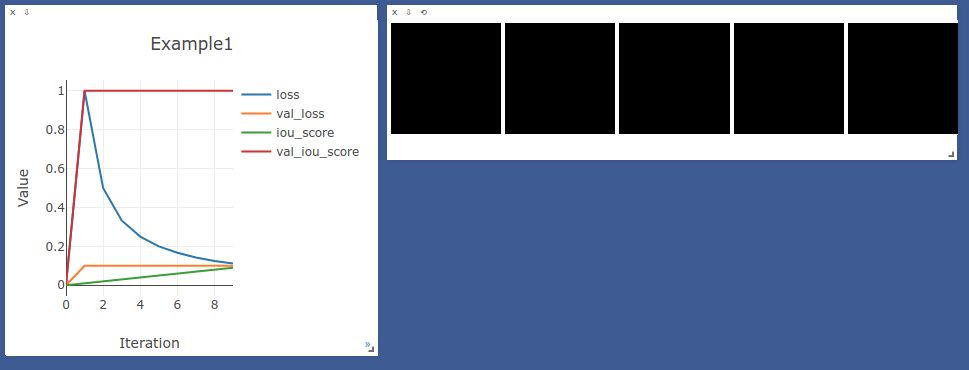